In [1]:
from main import *
from data_vis import *

In [2]:
workplace1 = address('55 Av. de Bordeaux', '42000', 'Mimizan','France')
workplace2 = address('619 Av. du Maréchal Lyautey','40600','Biscarrosse','France')

gc_1 = get_coordinates(workplace1.address)
gc_2 = get_coordinates(workplace2.address)
mid_geoloc = get_mid_geolocalisation(gc_1, gc_2)

graph = get_roadmap(gc_1, gc_2)

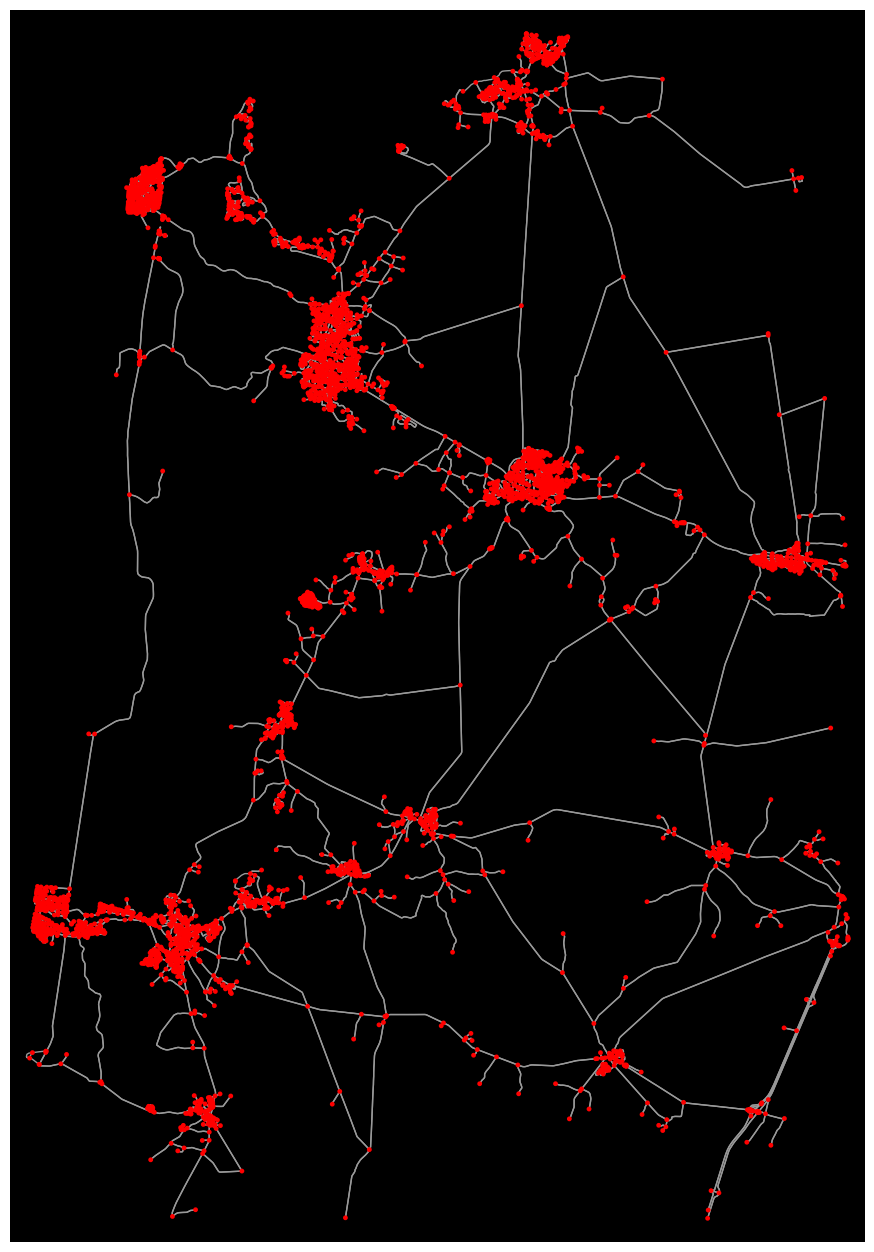

In [3]:
graph_visualisation(graph)

In [5]:
df = get_all_path_and_times(workplace1, workplace2, min_samples=1)

In [6]:
map_starting_points = map_visualisation_starting_points(df, mid_geoloc)

map_starting_points

In [7]:
df.head(10)


,node_number,node_x,node_y,path_to_wpl1,time_to_wpl1,path_to_wpl2,time_to_wpl2
0,610338422,-1.219525,44.145453,"[610338422, 1503340270, 1523680206, 1503340288...",522.6,"[610338422, 1503340270, 1523680206, 1503340288...",2557.0
1,6331737114,-1.248570,44.206619,"[6331737114, 6331737179, 6331737178, 633173721...",122.5,"[6331737114, 6331737179, 6331737178, 633173721...",2061.7
2,288707039,-1.152795,44.224387,"[288707039, 21460987, 3547695670, 21460983, 88...",546.2,"[288707039, 5196963858, 288707190, 21460999, 8...",1558.8
3,21461020,-1.121011,44.241294,"[21461020, 3045200302, 21461012, 21461008, 883...",799.4,"[21461020, 1588546748, 1588546750, 21461021, 1...",1305.6
4,1354186939,-1.159961,44.316988,"[1354186939, 1354008786, 884202011, 4071312869...",1165.8,"[1354186939, 4071313199, 4071313242, 407131325...",1107.3
5,21461096,-1.101821,44.323651,"[21461096, 5470771866, 5093049197, 21461058, 2...",1447.4,"[21461096, 884210273, 4973507127, 4973507139, ...",655.9
6,3491169249,-1.070248,44.352813,"[3491169249, 2181106333, 7285017155, 143092984...",1748.8,"[3491169249, 2181106333, 1430956957, 143095695...",436.5
7,21461177,-1.073991,44.484244,"[21461177, 21461176, 272337755, 5474329338, 27...",2450.0,"[21461177, 21461176, 272337755, 5474329338, 27...",767.2
8,689385934,-0.967257,44.146165,"[689385934, 4208538884, 4675508747, 4675508776...",1307.2,"[689385934, 833459851, 1832268997, 833459872, ...",1979.6
9,2269070837,-0.929348,44.206068,"[2269070837, 689341960, 4675433917, 4675433925...",1547.0,"[2269070837, 689342085, 1912567263, 1260013437...",1688.4


/Users/loicchamberlin/Documents/loic-perso/optimum-time-place-to-live/data_vis.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap[col] = heatmap[col].apply(lambda x:


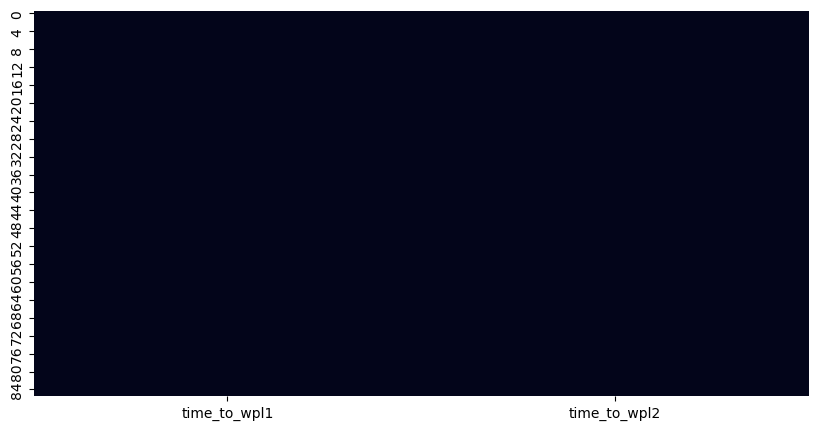

In [8]:
time_analysis(df)

In [9]:
# Calculate the sum of 'time_to_wpl1' and 'time_to_wpl2' columns
first_min_rows = top_fastest_routes(df,3)

results = first_min_rows.drop(['sum_times',	'diff_times'],axis=1)
results

,node_number,node_x,node_y,path_to_wpl1,time_to_wpl1,path_to_wpl2,time_to_wpl2,tot_times,id
65,3547638364,-1.102518,44.285944,"[3547638364, 1588618598, 21461021, 21461020, 3...",1157.0,"[3547638364, 21461096, 884210273, 4973507127, ...",946.8,2314.0,2
4,1354186939,-1.159961,44.316988,"[1354186939, 1354008786, 884202011, 4071312869...",1165.8,"[1354186939, 4071313199, 4071313242, 407131325...",1107.3,2331.6,2
3,21461020,-1.121011,44.241294,"[21461020, 3045200302, 21461012, 21461008, 883...",799.4,"[21461020, 1588546748, 1588546750, 21461021, 1...",1305.6,2611.2,2


In [10]:
# creating pandas dataframe to stock the value
dtf = pd.DataFrame(data={
                         'id': [0,1],
                         'node_y': [gc_1[0],gc_2[0]],
                         'node_x': [gc_1[1],gc_2[1]]})

dtf



,id,node_y,node_x
0,0,44.202611,-1.229633
1,1,44.390746,-1.160326


In [11]:
end_dtf  = pd.concat([dtf, results])
end_dtf

,id,node_y,node_x,node_number,path_to_wpl1,time_to_wpl1,path_to_wpl2,time_to_wpl2,tot_times
0,0,44.202611,-1.229633,NaN,NaN,NaN,NaN,NaN,NaN
1,1,44.390746,-1.160326,NaN,NaN,NaN,NaN,NaN,NaN
65,2,44.285944,-1.102518,3.547638e+09,"[3547638364, 1588618598, 21461021, 21461020, 3...",1157.0,"[3547638364, 21461096, 884210273, 4973507127, ...",946.8,2314.0
4,2,44.316988,-1.159961,1.354187e+09,"[1354186939, 1354008786, 884202011, 4071312869...",1165.8,"[1354186939, 4071313199, 4071313242, 407131325...",1107.3,2331.6
3,2,44.241294,-1.121011,2.146102e+07,"[21461020, 3045200302, 21461012, 21461008, 883...",799.4,"[21461020, 1588546748, 1588546750, 21461021, 1...",1305.6,2611.2


In [12]:
map_ = map_visualisation_end_routes(mid_geoloc, end_dtf, graph, display_routes=True)

map_

/Users/loicchamberlin/Documents/loic-perso/optimum-time-place-to-live/data_vis.py:63: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_route_folium(graph, route=path_list1,
/Users/loicchamberlin/Documents/loic-perso/optimum-time-place-to-live/data_vis.py:65: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_route_folium(gra

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 2 rows and 1 column
fig = make_subplots(rows=2, cols=2, shared_xaxes=False, vertical_spacing=0.15)
print(len(df['sum_times']), '&', len(df['diff_times']))
# Scatter plot
scatter_trace = go.Scatter(x=df['time_to_wpl1'], y=df['time_to_wpl2'], mode='markers')
fig.add_trace(scatter_trace, row=1, col=1)
scatter_trace2 = go.Scatter(x=df['sum_times'], y=df['diff_times'], mode='markers')
fig.add_trace(scatter_trace2, row=2, col=1)

# Histogram
histogram_trace = go.Histogram(x=df['sum_times'], nbinsx=int(df['sum_times'].max() / 10) + 1)
fig.add_trace(histogram_trace, row=1, col=2)
histogram_trace2 = go.Histogram(x=df['diff_times'], nbinsx=int(df['diff_times'].max() / 10) + 1)
fig.add_trace(histogram_trace2, row=2, col=2)

# Update layout for the scatter plot
fig.update_xaxes(title_text='Time Travel to Workplace 1', row=1, col=1)
fig.update_yaxes(title_text='Time Travel to Workplace 2', row=1, col=1)

fig.update_xaxes(title_text='sum_times', row=2, col=1)
fig.update_yaxes(title_text='diff_times', row=2, col=1)

fig.update_layout(title_text='time2 of times 1 scatter & histogram of sum of times 1&2', height=600)

# Update layout for the histogram
fig.update_xaxes(title_text='Sum of both time travels (s)', row=1, col=2)
fig.update_yaxes(title_text='Number of nodes', row=1, col=2)

fig.update_xaxes(title_text='Difference of both time travels (s)', row=2, col=2)
fig.update_yaxes(title_text='Number of nodes', row=2, col=2)
# Display the combined figure
fig.show()


86 & 86
